# **HODGKIN-HUXLEY MODEL**
*  #### `This model tells us how neurol generate and propogate electircal singal known action potential ( also spikes)`
<div style="display:flex; gap:18px; align-items:center;">
  <!-- Left: plots image -->
  <div style="flex:1; text-align:center;">
    <img src="Graphics_asset/neral_spike.gif" alt="Hodgkin–Huxley Simulation Plots" width="65%" style="border-radius:10px;">
    <p style="font-size:0.9em; color:gray;"><i>Figure 1: Membrane potential and gating variable dynamics</i></p>
  </div>

  <!-- Right: equations (LaTeX, not an image) -->
  <div style="flex:1; text-align:center;">
  
$$
\begin{aligned}
C_m \frac{dV}{dt} &= \bar{g}_{Na} m^3 h \,(E_{Na}-V)
+ \bar{g}_{K} n^4 (E_{K}-V)
+ g_{L} (E_{L}-V) \\
\frac{dm}{dt} &= \alpha_m(V)\,(1-m) - \beta_m(V)\,m \\
\frac{dh}{dt} &= \alpha_h(V)\,(1-h) - \beta_h(V)\,h \\
\frac{dn}{dt} &= \alpha_n(V)\,(1-n) - \beta_n(V)\,n
\end{aligned}
$$

  
  <p style="font-size:0.9em; color:gray;"><i>Figure 2: Hodgkin–Huxley model system of differential equations</i></p>
  </div>
</div>


### ⚙️ Final Two Differential Equations
*(Standard 2-variable Hodgkin–Huxley reduction)*

Assume $m \approx m_\infty(V)$ and $h \approx h_\infty(V)$.
Then the reduced system becomes:

$$
\boxed{
C_m \frac{dV}{dt}
= - g_{Na} \, m_\infty(V)^3 \, h_\infty(V) \, (V - E_{Na})
- g_K \, n^4 (V - E_K)
- g_L (V - E_L)
+ I_{\text{ext}}
}
$$

$$
\boxed{
\frac{dn}{dt} = \frac{n_\infty(V) - n}{\tau_n(V)}
}
$$

---

### 🧩 Parameter Definitions

* $C_m$: membrane capacitance
* $g_{Na}, g_K, g_L$: maximum conductances
* $E_{Na}, E_K, E_L$: reversal potentials

And the voltage-dependent steady-state functions:

$$
m_\infty(V) = \frac{\alpha_m(V)}{\alpha_m(V) + \beta_m(V)}, \quad
h_\infty(V) = \frac{\alpha_h(V)}{\alpha_h(V) + \beta_h(V)}, \quad
n_\infty(V) = \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
$$

Time constant for $n$:

$$
\tau_n(V) = \frac{1}{\alpha_n(V) + \beta_n(V)}
$$

### Parameter roster

In [1]:
using DifferentialEquations, Plots


### Mission Parameters
* These are not simple parameter these are calculated experimentaly by Alan Hodgkin and Andrew Huxley, using voltage-clamp experiments.

In [ ]:

Cm = 1.0        # μF/cm^2
g_Na = 120.0    # mS/cm^2
g_K = 36.0      # mS/cm^2
g_L = 0.3       # mS/cm^2
E_Na = 50.0     # mV
E_K = -77.0     # mV
E_L = -54.387   # mV
I_ext = 5.0 # μA/cm^2

1.0

* To deterine the position and probability of gates to be in premissive or non permissive state , we will define its dynamics
    * alpha and beta determine the rate of change from premissive to non premissive state and vice-versa


## Detailed Note: Hodgkin–Huxley Rate Functions (α and β)

The Hodgkin–Huxley model describes how ion channels open and close in response to membrane voltage.  
Each channel gate (n, m, h) is controlled by **voltage-dependent rate functions**:

- α(V): opening rate  
- β(V): closing rate  

These rates determine:
$$
x_{\infty}(V) = \frac{\alpha_x(V)}{\alpha_x(V) + \beta_x(V)}, \qquad
\tau_x(V) = \frac{1}{\alpha_x(V) + \beta_x(V)}
$$

The six functions below were **obtained empirically** by fitting smooth equations to voltage-clamp experimental data from the squid axon (Hodgkin–Huxley, 1952).

---

## 1. Potassium Activation Gate (n)

The *n gate* controls the opening of voltage-gated potassium channels.

### **Opening rate**
$$
\alpha_n(V) = 0.01\,\frac{V + 55}{1 - e^{-(V+55)/10}}
$$

### **Closing rate**
$$
\beta_n(V) = 0.125\, e^{-(V+65)/80}
$$

These functions produce:
- a **sigmoidal steady-state activation** $n_\infty(V)$
- a **voltage-dependent time constant** $\tau_n(V)$

Potassium activation is **slow**, giving the K⁺ current its delayed rise during an action potential.

---

## 2. Sodium Activation Gate (m)

The *m gate* is responsible for the **fast activation** of sodium channels.

### **Opening rate**
$$
\alpha_m(V) = 0.1\,\frac{V + 40}{1 - e^{-(V+40)/10}}
$$

### **Closing rate**
$$
\beta_m(V) = 4\, e^{-(V+65)/18}
$$

These produce:
- a **very fast activation** $m_\infty(V)$
- a small $\tau_m(V)$

This rapid m-activation is what makes the action potential **spike upward so quickly**.

---

## 3. Sodium Inactivation Gate (h)

The *h gate* controls sodium channel **inactivation**, which turns Na⁺ current off after it opens.

### **Opening rate**
$$
\alpha_h(V) = 0.07\, e^{-(V+65)/20}
$$

### **Closing rate**
$$
\beta_h(V) = \frac{1}{1 + e^{-(V+35)/10}}
$$

Important properties:
- \(h\) **decreases** when the membrane depolarizes  
- This causes Na⁺ channels to inactivate during the spike  
- \(h\) **recovers slowly** when the cell repolarizes  

This mechanism makes the action potential **brief**, preventing continuous Na⁺ flow.

---

## Why These Functions Look Like This

- The exponential terms ensure **voltage sensitivity**.
- The linear-over-exponential terms avoid singularities at specific voltages.
- All forms were chosen because they **fit experimental voltage-clamp data smoothly** and produce biologically realistic dynamics.

These six functions—αₙ, βₙ, αₘ, βₘ, αₕ, βₕ—form the foundation of the Hodgkin–Huxley model and determine how the neuron generates and shapes action potentials.

---

## Summary

- **n**: slow K⁺ activation  
- **m**: fast Na⁺ activation  
- **h**: Na⁺ inactivation  
- α = opening rate, β = closing rate  
- All six functions come from **data fitting**, not physics  
- They define the **steady state** and **time constant** of each gate  

These rate functions allow the Hodgkin–Huxley equations to reproduce the full dynamics of the action potential with remarkable accuracy.



In [24]:
# Gating kinetics
α_n(V) = 0.01 * (V + 55) / (1 - exp(-(V + 55) / 10))
β_n(V) = 0.125 * exp(-(V + 65) / 80)
α_m(V) = 0.1 * (V + 40) / (1 - exp(-(V + 40) / 10))
β_m(V) = 4.0 * exp(-(V + 65) / 18)
α_h(V) = 0.07 * exp(-(V + 65) / 20)
β_h(V) = 1 / (1 + exp(-(V + 35) / 10))

β_h (generic function with 1 method)



In the Hodgkin–Huxley model, each **gating variable** ($x \in \{m, h, n\}$) describes the probability that a specific ion-channel gate is open. These gating variables do not change instantaneously when the membrane voltage ($V$) changes. Instead, each gate gradually approaches a new equilibrium, with a speed determined by voltage.

### 1. Original Hodgkin–Huxley Gating Equation
Each gating variable ($x$) is governed by the differential equation:

$$
\frac{dx}{dt} = \alpha_x(V)\big(1 - x\big) - \beta_x(V)x
$$

* **$\alpha_x(V)$**: rate of gate opening
* **$\beta_x(V)$**: rate of gate closing

These rates come from experimental voltage-clamp measurements.

### 2. Rewriting the Equation: The Intuitive Form
The equation can be algebraically transformed into a much more intuitive form:

$$
\frac{dx}{dt} = \frac{x_{\infty}(V) - x}{\tau_x(V)}
$$

This form introduces two essential voltage-dependent quantities:

### 3. Steady-State Value ($x_{\infty}(V)$)

$$
x_{\infty}(V) = \frac{\alpha_x(V)}{\alpha_x(V) + \beta_x(V)}
$$

This represents the **equilibrium (final) value** of the gating variable at a fixed voltage ($V$).

If the neuron is voltage-clamped at $V$, and we wait long enough, then:

$$
x(t) \longrightarrow x_{\infty}(V)
$$

Thus, $x_{\infty}(V)$ describes **where the gate wants to go**.

### 4. Time Constant ($\tau_x(V)$)

$$
\tau_x(V) = \frac{1}{\alpha_x(V) + \beta_x(V)}
$$

This quantity determines **how fast** the gating variable approaches its steady-state value.

* **Small $\tau_x$** $\rightarrow$ very fast response
* **Large $\tau_x$** $\rightarrow$ slow gating dynamics

During an action potential:
* $m$ ($Na^+$ activation) is very fast $\rightarrow$ small $\tau_m$
* $h$ ($Na^+$ inactivation) and $n$ ($K^+$ activation) are slower $\rightarrow$ larger $\tau_h$, $\tau_n$

These differences in timescales shape the spike.

### 5. Why This Form Is Useful
The rewritten form:

$$
\frac{dx}{dt} = \frac{x_{\infty}(V) - x}{\tau_x(V)}
$$

makes several things clear:
* $x_{\infty}(V)$ is the **target value**.
* $1/\tau_x(V)$ controls the **speed** toward that target.
* The equation becomes easier to interpret and simulate.

Almost all modern computational neuroscience uses the $(x_\infty, \tau_x)$ representation.

### 6. How Hodgkin & Huxley Obtained These From Experiments
Using voltage-clamp:
1.  Clamp membrane at voltage $V$.
2.  Measure the gating variable time course $x(t)$.
3.  Fit it to an exponential:
    $$
    x(t) = x_{\infty}(V) - \big(x_{\infty}(V) - x_0\big)e^{-t/\tau_x(V)}
    $$
4.  From this fit:
    * The final value gives $x_\infty(V)$.
    * The rate of decay gives $\tau_x(V)$.
5.  Then:
    $$
    \alpha_x(V) = \frac{x_{\infty}(V)}{\tau_x(V)}, \qquad
    \beta_x(V) = \frac{1 - x_{\infty}(V)}{\tau_x(V)}
    $$
These fitted values lead to the famous $\alpha$ and $\beta$ functions.

---
### In Summary
* **$x_\infty(V)$**: where the gate wants to be
* **$\tau_x(V)$**: how fast it gets there

Both are derived from the experimentally obtained $\alpha$ and $\beta$ rates. These quantities give the gating-variable equation its simple 1st-order form:

$$
\frac{dx}{dt} = \frac{x_\infty(V) - x}{\tau_x(V)}
$$

This formulation lies at the heart of the Hodgkin–Huxley model and is used in almost every modern neuron model.

-----

And the voltage-dependent steady-state functions:

$$
m_\infty(V) = \frac{\alpha_m(V)}{\alpha_m(V) + \beta_m(V)}, \quad
h_\infty(V) = \frac{\alpha_h(V)}{\alpha_h(V) + \beta_h(V)}, \quad
n_\infty(V) = \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
$$

Time constant for $n$:

$$
\tau_n(V) = \frac{1}{\alpha_n(V) + \beta_n(V)}
$$
------

In [25]:
    # Lets define the steady_state

    m_inf(V)=α_m(V)/(α_m(V)+β_m(V))  
    h_inf(V)=α_h(V)/(α_h(V)+β_h(V))
    n_inf(V)=α_n(V)/(α_n(V)+β_n(V))

    tau_n(V) = 1/(α_n(V)+β_n(V))
    


tau_n (generic function with 1 method)

In [ ]:

p = [Cm, g_Na, g_K, g_L, E_Na, E_K, E_L, I_ext]

8-element Vector{Float64}:
   1.0
 120.0
  36.0
   0.3
  50.0
 -77.0
 -54.387
  10.0

In [29]:
function hodgkin_huxley_reduced!(du, u, p, t)
    
    V, n = u

    
    Cm, g_Na, g_K, g_L, E_Na, E_K, E_L, I_ext = p

    
    m = m_inf(V)
    h = h_inf(V)


    I_Na = g_Na * m^3 * h * (E_Na-V)
    I_K = g_K * n^4 * (E_K-V)
    I_L = g_L * (E_L-V)

# Define the derivatives based on the (V-E) convention
    # dV/dt
    du[1] = (I_ext + I_Na + I_K + I_L) / Cm
    # dn/dt
    du[2] = (n_inf(V) - n) / tau_n(V)
end



hodgkin_huxley_reduced! (generic function with 1 method)

`This single function, hodgkin_huxley_reduced!, is the culmination of our entire expedition so far. It encapsulates the reduced biophysical reality of the neuron. Given a current state (V, n) and a stimulus I_ext, it precisely dictates the trajectory of the system—how voltage and the potassium gates will evolve in the next instant. It is a perfect, self-contained engine of neural dynamics.`

In [30]:
# Initial Conditions
V₀ = -65.0  # Initial membrane potential (mV)
n₀ = n_inf(V₀) # Assume the n-gate starts at its steady-state value for the resting potential
u₀ = [V₀, n₀]
# Simulation time span
tspan = (0.0, 100.0)  # ms


(0.0, 100.0)

In [31]:
# Create and solve the ODE problem
prob = ODEProblem(hodgkin_huxley_reduced!, u₀, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 45-element Vector{Float64}:
   0.0
   0.15582973361154434
   0.5531095560086059
   1.0787382990655914
   1.5072546260009105
   1.8083638564280744
   2.1828877998726064
   2.5831647911418325
   2.894123708626335
   3.313729658309024
   ⋮
  66.24211737348718
  70.81976560780748
  75.07393190009181
  79.60074381880614
  83.73722179769678
  88.16952709560204
  92.19335293471475
  96.55638585765605
 100.0
u: 45-element Vector{Vector{Float64}}:
 [-65.0, 0.3176769140606974]
 [-63.47419561959558, 0.31801557204846265]
 [-59.68708983604256, 0.32193060184021005]
 [-53.402385027600545, 0.33482307423926994]
 [-40.51322508783122, 0.3587496838766288]
 [-27.113610874854167, 0.39575447589298024]
 [-25.647410411006504, 0.4512322973335747]
 [-32.12968766729138, 0.495891140495179]
 [-38.40970382473973, 0.5175337722061223]
 [-51.045666847877655, 0.5292718465030304]
 ⋮
 [-59.595503498302335, 0.4033208615719949]
 [-59.523983635011, 0.4028169960922092]
 [-5

In [ ]:
using Plots

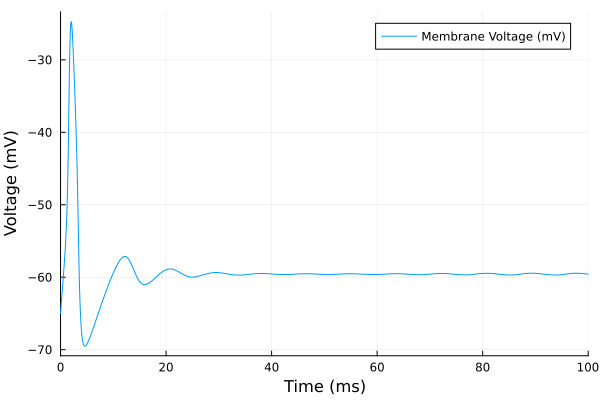

In [33]:
# Plot the results
plot(sol, vars=(0, 1), label="Membrane Voltage (mV)", xlabel="Time (ms)", ylabel="Voltage (mV)")